                                   NATIONAL COLLEGE OF IRELAND
                                   Database and Analytics Programming
                                   Final merger of Three Datasets

In [1]:
# importing the library
import psycopg2 as pg
import pandas.io.sql as psql
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#ignore error messages
import sys
import warnings

if not sys.warnoptions:
    warnings.simplefilter("ignore") 

In [2]:
# connecting to postgress and reading the data from psql
connection = pg.connect("host=192.168.56.30 dbname=postgres user=dap password=dap")
airtabledf = psql.read_sql('SELECT * FROM airtable', connection)

In [3]:
oiltabledf = psql.read_sql('SELECT * FROM oiltable', connection)

In [4]:
solartabledf = psql.read_sql('SELECT * FROM solartable', connection)

In [5]:
#data set pre processing before joining, just finding the unique values for dataframe airtables
airtabledf.keys()

Index(['index', 'MeasureId', 'MeasureName', 'MeasureType',
       'StratificationLevel', 'StateFips', 'StateName', 'CountyFips',
       'CountyName', 'ReportYear', 'Value', 'DataOrigin', 'MonitorOnly'],
      dtype='object')

In [6]:
#finding the unique values for dataframe oiltable
oiltabledf.keys()

Index(['index', 'ProductionYear', 'Production Date Entered', 'Operator',
       'County', 'Town', 'Field', 'Producing Formation', 'Active Oil Wells',
       'Inactive Oil Wells', 'Active Gas Wells', 'Inactive Gas Wells',
       'Injection Wells', 'Disposal Wells', 'Self-use Well', 'OilProduced',
       'GasProduced', 'Waterproduced', 'TaxableGas', 'Purchaser Codes',
       'Location'],
      dtype='object')

In [7]:
#finding the unique values for dataframe solartable
solartabledf.keys()

Index(['index', 'Project Number', 'City', 'County', 'State', 'Zip Code',
       'Sector', 'Program Type', 'Solicitation', 'Electric Utility',
       'Purchase Type', 'Date Application Received', 'Date Completed',
       'Project Status', 'Contractor', 'Primary Inverter Manufacturer',
       'Total Inverter Quantity', 'Primary PV Module Manufacturer',
       'Total PV Module Quantity', 'Project Cost', 'Incentive',
       'Total Nameplate kW DC', 'Expected KWh Annual Production',
       'Affordable Solar', 'Community Distributed Generation', 'Location 1',
       'NYS Municipal Boundaries', 'computedregion'],
      dtype='object')

In [8]:
# droping some of the coloum for dataset  airtable 
airtabledf = airtabledf.drop(['MeasureId','MeasureType','StratificationLevel','StateFips','StateName','CountyFips','DataOrigin','MonitorOnly'], axis=1)

In [9]:
# droping some of the coloum for dataset oiltable
oiltabledf = oiltabledf.drop(['Production Date Entered','Field','Producing Formation','Injection Wells','Disposal Wells','Self-use Well','Waterproduced','TaxableGas','Purchaser Codes','Location'], axis=1)

In [10]:
#droping some of the coloum for dataset solar table
solartabledf = solartabledf.drop(['Project Number','State','Zip Code','Sector','Solicitation','Date Application Received','Date Completed','Contractor','Primary Inverter Manufacturer'], axis=1)

In [11]:
#droping some of the coloum for dataset solar table
solartabledf = solartabledf.drop(['Total Inverter Quantity','Primary PV Module Manufacturer','Total PV Module Quantity','Incentive','Total Nameplate kW DC','Community Distributed Generation','Location 1','NYS Municipal Boundaries','computedregion'], axis=1)

In [12]:
# displaying coloum names
airtabledf.keys()

Index(['index', 'MeasureName', 'CountyName', 'ReportYear', 'Value'], dtype='object')

In [13]:
# displaying coloum names
oiltabledf.keys()

Index(['index', 'ProductionYear', 'Operator', 'County', 'Town',
       'Active Oil Wells', 'Inactive Oil Wells', 'Active Gas Wells',
       'Inactive Gas Wells', 'OilProduced', 'GasProduced'],
      dtype='object')

In [14]:
# displaying coloum names
solartabledf.keys()

Index(['index', 'City', 'County', 'Program Type', 'Electric Utility',
       'Purchase Type', 'Project Status', 'Project Cost',
       'Expected KWh Annual Production', 'Affordable Solar'],
      dtype='object')

Renaming the variables

In [15]:
#rename the coloum name in dataset airtabledf
airtabledf.rename(columns={'CountyName':'County'}, inplace=True)

In [16]:
#rename the coloum name in dataset oiltable
oiltabledf.rename(columns={'Town':'City'}, inplace=True)

In [17]:
# backup of dataframes
airBackup = airtabledf
oilBackup = oiltabledf
solarBackup = solartabledf

In [18]:
#identifying the unique measurenames
airtabledf['MeasureName'].unique()

array(['Number of days with maximum 8-hour average ozone concentration over the National Ambient Air Quality Standard',
       'Percent of days with PM2.5 levels over the National Ambient Air Quality Standard (NAAQS)',
       'Person-days with PM2.5 over the National Ambient Air Quality Standard',
       'Number of person-days with maximum 8-hour average ozone concentration over the National Ambient Air Quality Standard'],
      dtype=object)

In [19]:
#converting the measure names into integer for dataset air
airtabledf['MeasureName'] = airtabledf['MeasureName'].astype("category").cat.codes

In [20]:
#after convetion of categorical variable
airtabledf['MeasureName'].unique()

array([0, 2, 3, 1], dtype=int8)

In [21]:
#all the measurename have been converted to integer for dataset air
airtabledf.head(10000)

,index,MeasureName,County,ReportYear,Value
0,0,0,Clay,1999,33
1,1,0,Elmore,1999,5
2,2,0,Jefferson,1999,39
3,3,0,Lawrence,1999,28
4,4,0,Madison,1999,31
...,...,...,...,...,...
9995,9995,1,New Castle,2006,6853262
9996,9996,1,Sussex,2006,1823900
9997,9997,1,District of Columbia,2006,12554982
9998,9998,1,Alachua,2006,479012


In [22]:
# verifing the categorical values of measure names are converted
airtabledf['MeasureName'].unique()

array([0, 2, 3, 1], dtype=int8)

In [23]:
#identifying the unique measurenames
oiltabledf['Operator'].unique()

array(['Buffalo China, Inc.', 'Copper Ridge Oil, Inc.',
       'White, Walter W. & Christina L.', ..., 'Underlayer & Co.',
       'Pedestal Oil Co., Inc.', 'N.Y. Petro-Min Corp.'], dtype=object)

In [24]:
#for dataset oiltable converting into int
oiltabledf['Operator'] = oiltabledf['Operator'].astype("category").cat.codes

In [25]:
# verifing the categorical values of Operator are converted
oiltabledf['Operator'].unique()

array([ 150,  254, 1257, ..., 1193,  924,  846], dtype=int16)

In [26]:
#After convertion of categorical variables
oiltabledf.head(500)

,index,ProductionYear,Operator,County,City,Active Oil Wells,Inactive Oil Wells,Active Gas Wells,Inactive Gas Wells,OilProduced,GasProduced
0,0,1995,150,Erie,BUFFALO,0,0,1,0,0,106
1,1,1995,254,Steuben,WEST UNION,28,0,0,0,1229,0
2,2,1994,1257,Cattaraugus,CARROLLTON,3,0,0,0,462,0
3,3,1994,1134,Erie,CHEEKTOWAGA,0,0,1,0,0,530
4,4,1995,146,Cattaraugus,ALLEGANY,10,0,0,0,45,0
...,...,...,...,...,...,...,...,...,...,...,...
495,495,1995,61,Steuben,AVOCA,0,0,2,0,0,1923
496,496,1995,125,Cattaraugus,ALLEGANY,18,0,0,0,2034,0
497,497,1995,104,Livingston,LEICESTER,0,0,9,0,0,38245
498,498,1995,270,Chautauqua,CHERRY CREEK,0,0,2,0,0,0


In [27]:
#identifying the unique in the solar dataset
solartabledf['Program Type'].unique()

array(['Residential/Small Commercial',
       'Commercial/Industrial (Competitive)',
       'Commercial/Industrial (MW Block)'], dtype=object)

In [28]:
#identifying the unique in the solar dataset
solartabledf['Electric Utility'].unique()

array(['National Grid', 'PSEG Long Island', 'Consolidated Edison',
       'NYS Electric and Gas', 'Central Hudson Gas and Electric',
       'Rochester Gas and Electric', 'Orange and Rockland Utilities'],
      dtype=object)

In [29]:
#identifying the unique in the solar dataset
solartabledf['Purchase Type'].unique()

array(['Purchase', 'Lease', 'Power Purchase Agreement', None],
      dtype=object)

In [30]:
#identifying the unique in the solar dataset
solartabledf['Project Status'].unique()

array(['Complete', 'Pipeline'], dtype=object)

In [31]:
#identifying the unique in the solar dataset
solartabledf['Affordable Solar'].unique()

array(['No', 'Yes'], dtype=object)

In [32]:
#verifying catogerical variables are converted
solartabledf['Program Type'] = solartabledf['Program Type'].astype("category").cat.codes
solartabledf['Electric Utility'] = solartabledf['Electric Utility'].astype("category").cat.codes
solartabledf['Purchase Type'] = solartabledf['Purchase Type'].astype("category").cat.codes
solartabledf['Project Status'] = solartabledf['Project Status'].astype("category").cat.codes
solartabledf['Affordable Solar'] = solartabledf['Affordable Solar'].astype("category").cat.codes


In [33]:
#after conveting to category the unique in the solar dataset
solartabledf['Electric Utility'].unique()

array([3, 5, 1, 2, 0, 6, 4], dtype=int8)

In [34]:
#after conveting to category the unique in the solar dataset
solartabledf['Purchase Type'].unique()

array([ 2,  0,  1, -1], dtype=int8)

In [35]:
#after conveting to category the unique in the solar dataset
solartabledf['Program Type'].unique()

array([2, 0, 1], dtype=int8)

In [36]:
#after conveting to category the unique in the solar dataset
solartabledf['Project Status'].unique()

array([0, 1], dtype=int8)

In [37]:
#after conveting to category the unique in the solar dataset
solartabledf['Affordable Solar'].unique()

array([0, 1], dtype=int8)

In [38]:
solartabledf.head(2000)

,index,City,County,Program Type,Electric Utility,Purchase Type,Project Status,Project Cost,Expected KWh Annual Production,Affordable Solar
0,0,Scotia,Schenectady,2,3,2,0,22950,5987,0
1,1,Ridge,Suffolk,2,5,0,0,38552.2,9212,0
2,2,Montrose,Westchester,2,1,2,0,40900,9015,0
3,3,Bronx,Bronx,2,1,0,0,20832.35,3163,0
4,4,Bellmore,Nassau,2,5,0,0,44268,9279,0
...,...,...,...,...,...,...,...,...,...,...
1995,1994,Bellerose,Queens,2,1,-1,0,55230,7131,0
1996,1995,Amityville,Suffolk,2,5,0,0,50000,15354,0
1997,1996,East Islip,Suffolk,2,5,2,0,31000,6286,0
1998,1997,West Babylon,Suffolk,2,5,0,0,42299,8681,0


Final Merging of all the 3 datset
Firstly merging the 2 dataset that is solartabledf with oiltabledf and assinging the result into fdf.
Then merging the remaining airtabledf with the fdf.

In [39]:
#Merging all three dataset and assinging the result into super_merge.
super_merge = solartabledf.merge(oiltabledf,how='outer',on='index').merge(airtabledf,how='outer',on='index')

In [40]:
#printing the super_merge dataframe
super_merge

,index,City_x,County_x,Program Type,Electric Utility,Purchase Type,Project Status,Project Cost,Expected KWh Annual Production,Affordable Solar,...,Active Oil Wells,Inactive Oil Wells,Active Gas Wells,Inactive Gas Wells,OilProduced,GasProduced,MeasureName,County,ReportYear,Value
0,0,Scotia,Schenectady,2,3,2,0,22950,5987,0,...,0,0,1,0,0,106,0,Clay,1999,33
1,1,Ridge,Suffolk,2,5,0,0,38552.2,9212,0,...,28,0,0,0,1229,0,0,Elmore,1999,5
2,2,Montrose,Westchester,2,1,2,0,40900,9015,0,...,3,0,0,0,462,0,0,Jefferson,1999,39
3,3,Bronx,Bronx,2,1,0,0,20832.35,3163,0,...,0,0,1,0,0,530,0,Lawrence,1999,28
4,4,Bellmore,Nassau,2,5,0,0,44268,9279,0,...,10,0,0,0,45,0,0,Madison,1999,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9995,Bellmore,Nassau,2,5,0,0,43400,9097,0,...,0,0,0,4,0,0,1,New Castle,2006,6853262
9996,9996,Vestal,Broome,2,2,-1,0,30240,5940,0,...,72,8,0,0,4359,0,1,Sussex,2006,1823900
9997,9997,Locust Valley,Nassau,2,5,2,0,38532,11598,0,...,12,2,0,0,290,0,1,District of Columbia,2006,12554982
9998,9998,Hicksville,Nassau,2,5,2,0,49350,11034,0,...,2,0,0,0,30,0,1,Alachua,2006,479012


In [41]:
super_merge.keys()

Index(['index', 'City_x', 'County_x', 'Program Type', 'Electric Utility',
       'Purchase Type', 'Project Status', 'Project Cost',
       'Expected KWh Annual Production', 'Affordable Solar', 'ProductionYear',
       'Operator', 'County_y', 'City_y', 'Active Oil Wells',
       'Inactive Oil Wells', 'Active Gas Wells', 'Inactive Gas Wells',
       'OilProduced', 'GasProduced', 'MeasureName', 'County', 'ReportYear',
       'Value'],
      dtype='object')

  visuvalization for the merge dataframe

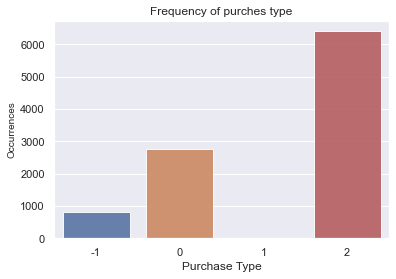

In [42]:
#this barplot shows the purchase type 2 is high, i.e more pepole choese to purchase. and least is the aggrement which id -1
st_count = super_merge['Purchase Type'].value_counts()
sns.set(style="darkgrid")
sns.barplot(st_count.index, st_count.values, alpha=0.9)
plt.title('Frequency of purches type')
plt.ylabel('Occurrences', fontsize=10)
plt.xlabel('Purchase Type', fontsize=12)
plt.show()

<AxesSubplot:title={'center':'Electric Utility'}>

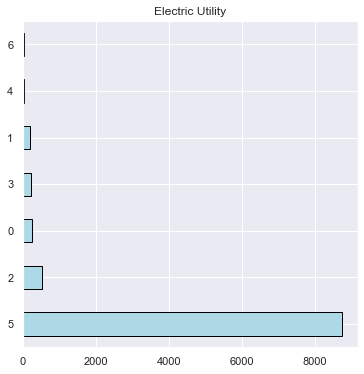

In [43]:
# to check which Electric Utility is high
super_merge['Electric Utility'].value_counts().plot(kind='barh', figsize=(6,6), 
                                     edgecolor=(0,0,0),color='lightblue', title='Electric Utility')

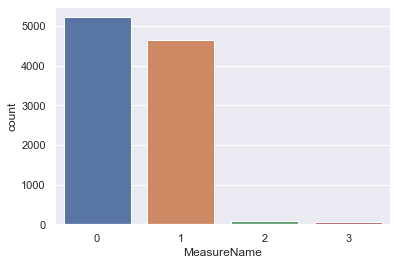

In [44]:
# which measure name has high count
p = sns.countplot(data=super_merge, x = 'MeasureName')

In [45]:
#converting the int datatype
super_merge['ProductionYear'] = super_merge['ProductionYear'].astype(int)

In [46]:
#converting the int datatype
super_merge['OilProduced'] = super_merge['OilProduced'].astype(int)

In [47]:
#converting the int datatype
super_merge['GasProduced'] = super_merge['GasProduced'].astype(int)

<AxesSubplot:ylabel='Frequency'>

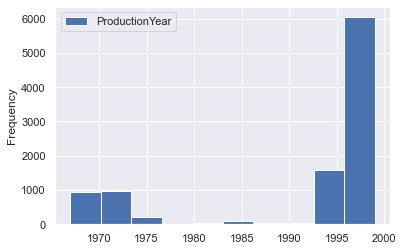

In [48]:
# in which production year oilproduction was high
super_merge.plot.hist(x="OilProduced", y=["ProductionYear"],figsize=(6,4))

<AxesSubplot:ylabel='Frequency'>

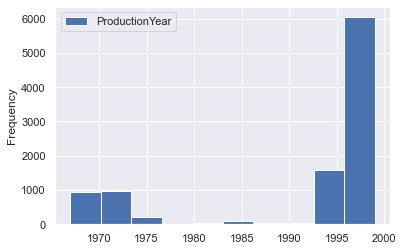

In [49]:
super_merge.plot.hist(x="GasProduced", y=["ProductionYear"],figsize=(6,4))

In [50]:
# identifying the 1 county from the count coloum
Nassau = super_merge.query('County_x == "Nassau" ')

<AxesSubplot:ylabel='Frequency'>

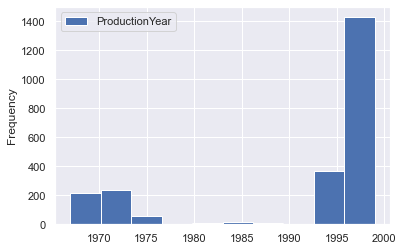

In [51]:
# identifying the the active oils well and production year in the county Nassau
Nassau.plot.hist(x="Active Oil Wells", y=["ProductionYear"],figsize=(6,4))


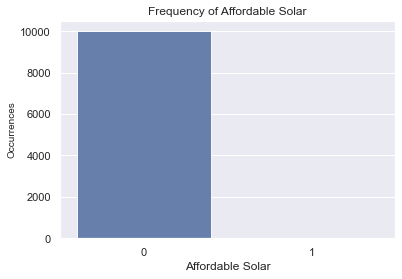

In [52]:
# verifying wheather the solar is affordable or not
st_count = super_merge['Affordable Solar'].value_counts()
sns.set(style="darkgrid")
sns.barplot(st_count.index, st_count.values, alpha=0.9)
plt.title('Frequency of Affordable Solar')
plt.ylabel('Occurrences', fontsize=10)
plt.xlabel('Affordable Solar', fontsize=12)
plt.show()